### LAB UNIT 5.2 PYTHON:

##### Customer Analysis Round 2

In [1]:
import numpy as np
import pandas as pd  
import random
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

### Get the data

In [2]:
data = pd.read_csv("Data/marketing_customer_analysis.csv")


In [3]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
#let's check what type of data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Show DataFrame info

we can describe the data looking at the first rows (data.head) or looking at the statisticals such as mean, median,quintiles, etc. using the data.describe()

In [5]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
data.describe() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
#let's make a cleaning to the data so it is easier to operate with it
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

In [9]:
data = data.rename(columns={'customer lifetime value':'cust_lifetime_value','monthly premium auto':'month_prem_auto', 'months since last claim':'months_last_claim','months since policy inception':'months_policy_incep', 'number of open complaints':'n_opencompl','number of policies':'n_policies', 'effective to date':'eff_date', 'vehicle class':'vehic_class', 'vehicle size':'vehic_size','sales channel':'sales_channel', 'renew offer type':'renew_offer', 'policy type':'policy_type', 'marital status':'marital_status', 'location code':'loc_code','total claim amount': 'tot_claim_amount'})

In [10]:
def missing_perc(df):
    round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
    nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', 'percent_nulls']
    return nulls_df

In [11]:
missing_perc(data) #more than 5% --> drop duplicates, not impute.

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,cust_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,eff_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [12]:
data=data.drop_duplicates()
data

,customer,state,cust_lifetime_value,response,coverage,education,eff_date,employmentstatus,gender,income,...,months_policy_incep,n_opencompl,n_policies,policy_type,policy,renew_offer,sales_channel,tot_claim_amount,vehic_class,vehic_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [13]:
data=data.dropna() #let's drop the rest of the nulls

#### Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`

In [14]:
data.dtypes #we can see here which variables are numeric (float, int) or categorical (object)

customer                object
state                   object
cust_lifetime_value    float64
response                object
coverage                object
education               object
eff_date                object
employmentstatus        object
gender                  object
income                   int64
loc_code                object
marital_status          object
month_prem_auto          int64
months_last_claim        int64
months_policy_incep      int64
n_opencompl              int64
n_policies               int64
policy_type             object
policy                  object
renew_offer             object
sales_channel           object
tot_claim_amount       float64
vehic_class             object
vehic_size              object
dtype: object

In [15]:
numerical=data.select_dtypes(include = np.number)
categorical=data.select_dtypes(include=['object'])

In [16]:
len(data.columns) #26 columns
len(categorical.columns)#16 columns
len(numerical.columns) #10 columns 

#we considered all variables from data either in categorical or numerical dfs! --> good

8

In [17]:
numerical

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [18]:
categorical

,customer,state,response,coverage,education,eff_date,employmentstatus,gender,loc_code,marital_status,policy_type,policy,renew_offer,sales_channel,vehic_class,vehic_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [19]:
numerical.columns

Index(['cust_lifetime_value', 'income', 'month_prem_auto', 'months_last_claim',
       'months_policy_incep', 'n_opencompl', 'n_policies', 'tot_claim_amount'],
      dtype='object')

####  Now we will try to check the distributions of the numerical variables visually

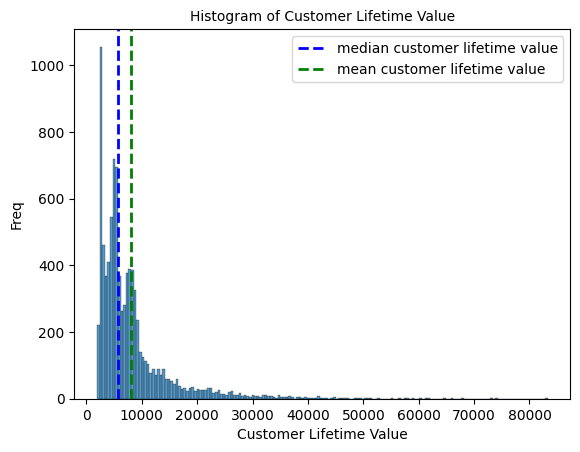

In [20]:
# histogram of customer lifetime value
graf=sns.histplot(data.cust_lifetime_value)
graf.axvline(data.cust_lifetime_value.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median customer lifetime value') # we use the median to reflect the central measure as the variable is (positively) skewed

graf.axvline(data.cust_lifetime_value.mean(),
            c="green",
            linewidth= 2.,
            linestyle='--',
            label='mean customer lifetime value') # when comparing to the mean, the mean is more to the right because of the positive skewness

plt.title('Histogram of Customer Lifetime Value', size=10)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Freq')
plt.legend()
plt.show()

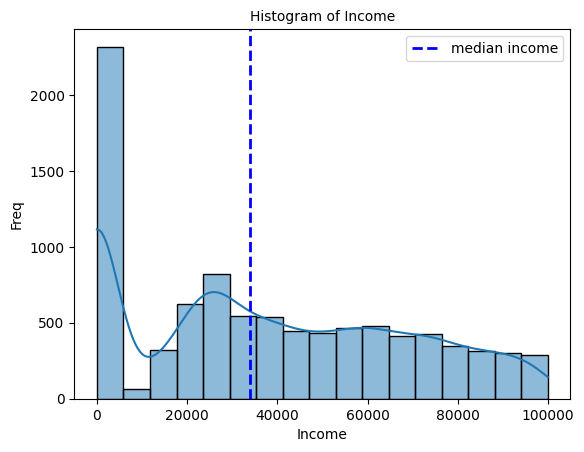

In [21]:
# histogram of income

graf = sns.histplot(x=data.income, kde=True)
graf.axvline(data.income.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median income') # median line (skewed)

plt.title('Histogram of Income', size=10)
plt.xlabel('Income')
plt.ylabel('Freq')
plt.legend()
plt.show()



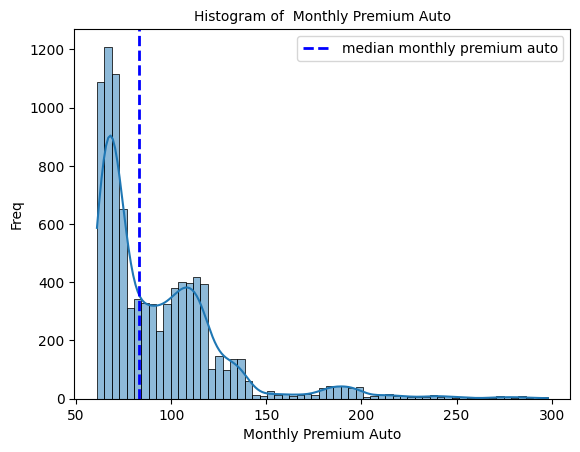

In [22]:
# histogram of monthly premium auto
graf=sns.histplot(data.month_prem_auto, kde=True)
graf.axvline(data.month_prem_auto.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median monthly premium auto') # median line (skewed)


plt.title('Histogram of  Monthly Premium Auto', size=10)
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Freq')
plt.legend()
plt.show()

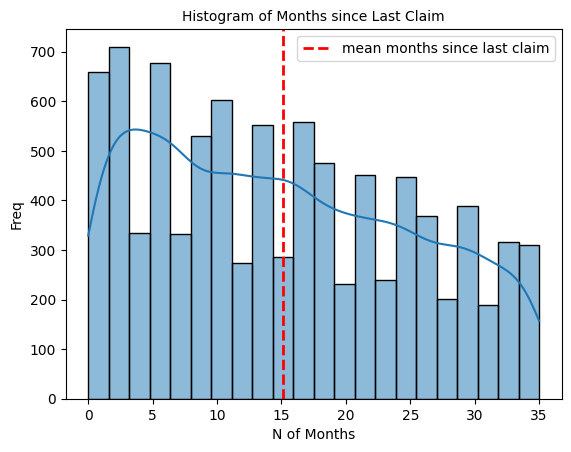

In [23]:
# histogram of months since last claim
graf = sns.histplot(data.months_last_claim, kde=True)
graf.axvline(data.months_last_claim.mean(),
            c="red",
            linewidth= 2.,
            linestyle='--',
            label='mean months since last claim') # mean line

plt.title('Histogram of Months since Last Claim', size=10)
plt.xlabel('N of Months')
plt.ylabel('Freq')
plt.legend()
plt.show()

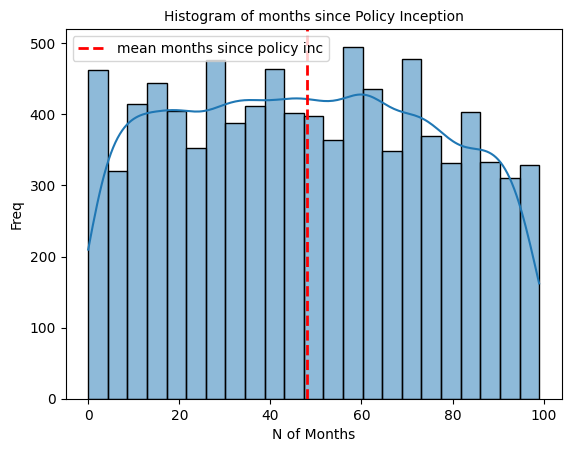

In [24]:
# histogram of months since policy inception
graf=sns.histplot(data.months_policy_incep, kde=True)
graf.axvline(data.months_policy_incep.mean(),
            c="red",
            linewidth= 2.,
            linestyle='--',
            label='mean months since policy inc') # mean line

plt.title('Histogram of months since Policy Inception', size=10)
plt.xlabel('N of Months')
plt.ylabel('Freq')
plt.legend()
plt.show()

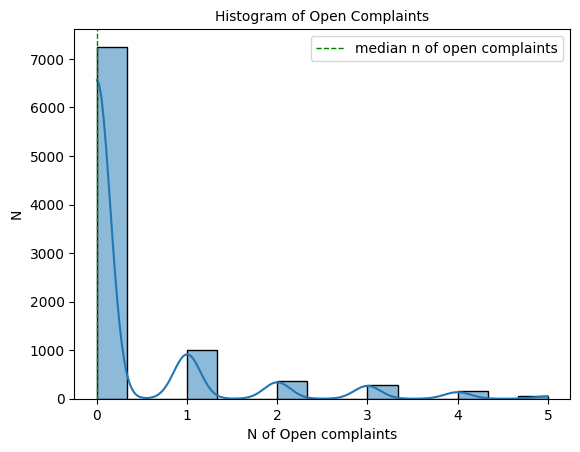

In [25]:
# histogram of number of open complaints
graf=sns.histplot(data.n_opencompl, kde=True)
graf.axvline(data.n_opencompl.median(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='median n of open complaints') # median line (skewed)

plt.title('Histogram of Open Complaints', size=10)
plt.xlabel('N of Open complaints')
plt.ylabel('N')
plt.legend()
plt.show()

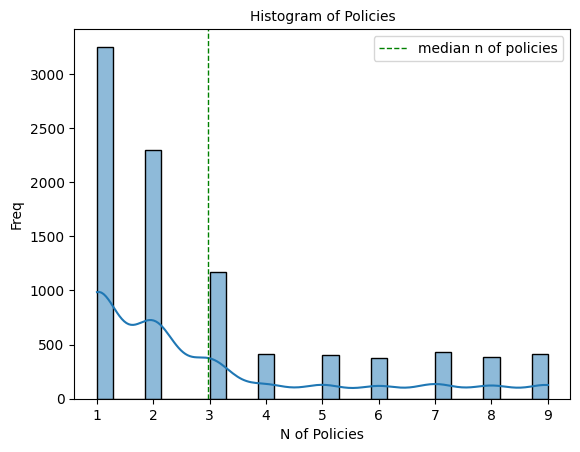

In [26]:
# histogram of number of policies

graf=sns.histplot(data.n_policies, kde=True)
graf.axvline(data.n_policies.mean(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='median n of policies') # median line

plt.title('Histogram of Policies', size=10)
plt.xlabel('N of Policies')
plt.ylabel('Freq')
plt.legend()
plt.show()

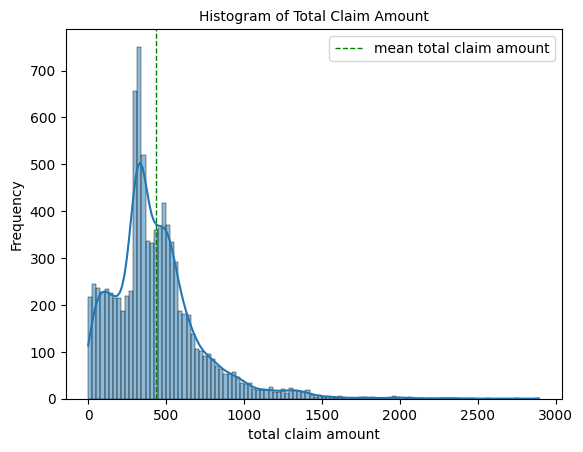

In [27]:
# histogram of total claim amount
graf=sns.histplot(data.tot_claim_amount, kde=True)
graf.axvline(data.tot_claim_amount.mean(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='mean total claim amount') # mean line

plt.title('Histogram of Total Claim Amount', size=10)
plt.xlabel('total claim amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [29]:
numerical.columns

Index(['cust_lifetime_value', 'income', 'month_prem_auto', 'months_last_claim',
       'months_policy_incep', 'n_opencompl', 'n_policies', 'tot_claim_amount'],
      dtype='object')

In [30]:
numerical.corr()

#the maximum correlation here is between 'number of open complaints' and 'total claim amoun' (0.69) 
#followed by 'monthly premium auto' and 'customer lifetime value' (0.39)
#apart from those, there is no such high correlation (>0.9) so we will drop no features

#a great correlation would exist between response and response_num as one is derived from the other directly (string vs. dummy variable) but does not apply here.

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount
cust_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
month_prem_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_policy_incep,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
n_opencompl,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
n_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
tot_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


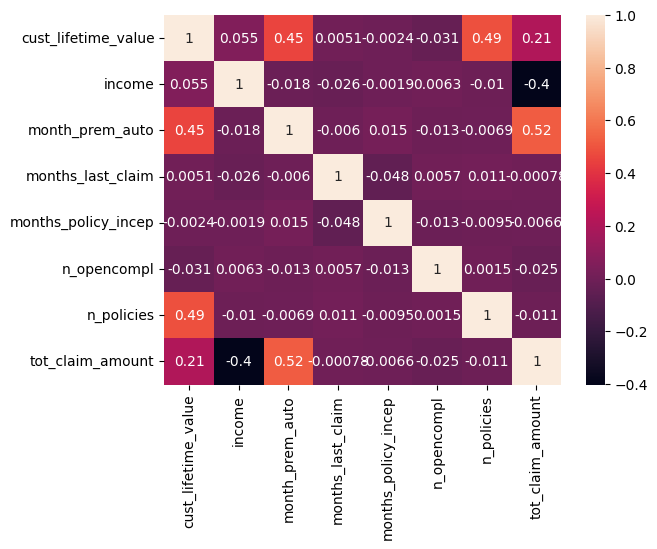

In [31]:
correl = numerical.corr(method = 'spearman')
sns.heatmap(correl, annot = True)
plt.show() # won't account for non-linear relations
#we use Spearman correlation as Pearson is very sensitive to outliers. When the distributions are not normal, better to use Spearman correlation, as in this case

 Split data into Y (`total_claim_amount`) and X (numerical, independent variables)

In [32]:
#import the libraries to start with linear regression:
from scipy.stats import norm
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
numerical.tail()

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000
9133,2611.836866,0,77,3,90,0,1,369.600000


In [34]:
Y = numerical['tot_claim_amount']
X = numerical.drop(['tot_claim_amount'], axis=1)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_lifetime_value  9134 non-null   float64
 1   income               9134 non-null   int64  
 2   month_prem_auto      9134 non-null   int64  
 3   months_last_claim    9134 non-null   int64  
 4   months_policy_incep  9134 non-null   int64  
 5   n_opencompl          9134 non-null   int64  
 6   n_policies           9134 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 499.6 KB


In [36]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       tot_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:47:52   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  72.3910    

In [37]:
#with this results we can say:

# the model fits quite well, given the R2 is over 0.5 (more than 50% of the dependent variable is explained by the
#behaviour of the independent variables included in the model)

#however, many variables are non-significant (P-value higher than 0.1). This means they don't affect 'Y' that much. Specially,
#n_policies, n_opencompl, months_last_claim and months_policy incep are non-significant. The rest of variables are 
#significant (the closer to 0 the p-value the more significant they are). Also it can be seen in the last 2 columns:
#those variables which are non-significant include the 0 in the interval, showing the value of the variable can be 0
#(no effect) or either have a negative and positive value, so no robust conclusions can be extracted from them. The higher the p-value the higher the confidence interval.

#The constant (alpha) shows that when the rest of the variables are 0 the total claim amount is approx. 72$
#The monthly_prem_auto means that an increse of one $ in the monthly premium auto increases approx. 5$ the total claim amount
#The bigger this amount (the beta) either positive or negative, the more it affects (positively or negatively) the Y.

#Regarding multicollinearity there is no correlation higher than 0.9 between variables, so no X variable was dropped.


In [38]:
#let's run the model using sklearn:

In [39]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2)) #it provides approx. the same value for R2 than statsmodel

R2 value is =  0.52


In [40]:
#dropping 'income' variable, as it is quite correlated to the Y variable, just to see the effect in the model

In [41]:
Y = numerical['tot_claim_amount']
X = numerical.drop(['tot_claim_amount','income'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_lifetime_value  9134 non-null   float64
 1   month_prem_auto      9134 non-null   int64  
 2   months_last_claim    9134 non-null   int64  
 3   months_policy_incep  9134 non-null   int64  
 4   n_opencompl          9134 non-null   int64  
 5   n_policies           9134 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 428.3 KB


<Axes: xlabel='month_prem_auto', ylabel='tot_claim_amount'>

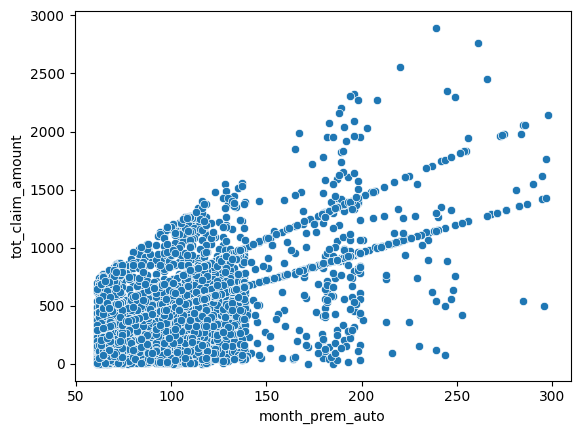

In [45]:
sns.scatterplot(x='month_prem_auto', y='tot_claim_amount', data=numerical)



<Axes: xlabel='cust_lifetime_value', ylabel='tot_claim_amount'>

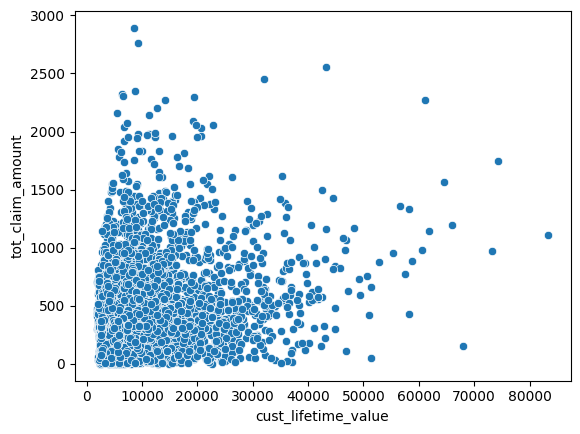

In [46]:
sns.scatterplot(x='cust_lifetime_value', y='tot_claim_amount', data=numerical)

<Axes: xlabel='income', ylabel='tot_claim_amount'>

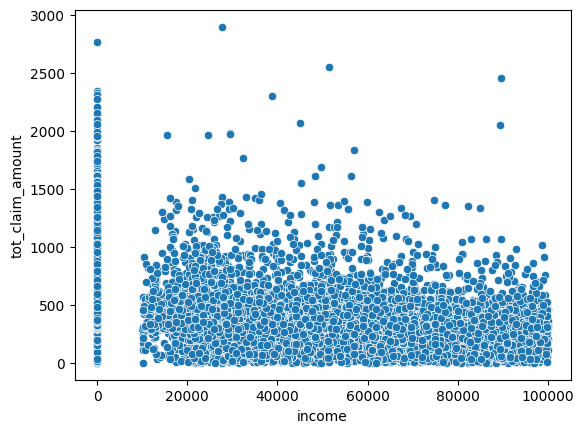

In [47]:
sns.scatterplot(x='income', y='tot_claim_amount', data=numerical) 

#by looking at the scatter plots there is not much linearity...maybe some transformation of the data would be needed to try if there is more linear relationship

In [48]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

print(model.summary())

#by not taking into account the income, the model fits worse! it makes sense given the income is a significant variable quite related to the Y so it would explain
#the Y at least partially...it makes sense.

                            OLS Regression Results                            
Dep. Variable:       tot_claim_amount   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     1015.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:49:29   Log-Likelihood:                -62429.
No. Observations:                9134   AIC:                         1.249e+05
Df Residuals:                    9127   BIC:                         1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -61.0112    

In [49]:
#in this case, the value of the R2 goes down. This is maybe because there is quite an effect of the income on the
#dependant variable. So this X explains the Y quite a lot. Dropping it makes the fit of the model worse. Let's see 
#the relation of income with the dependant variable